In [6]:
import pandas as pd

In [7]:
df_games_year = pd.read_csv(r'C:\Users\abdul\OneDrive\Desktop\video_game_sales\raw\year_genre_region.csv')
print(df_games_year.head())



   release_year     genre         region  sales
0          1980    Action  North America   0.32
1          1980  Fighting  North America   0.72
2          1980      Misc  North America   2.53
3          1980   Shooter  North America   6.56
4          1980    Sports  North America   0.46


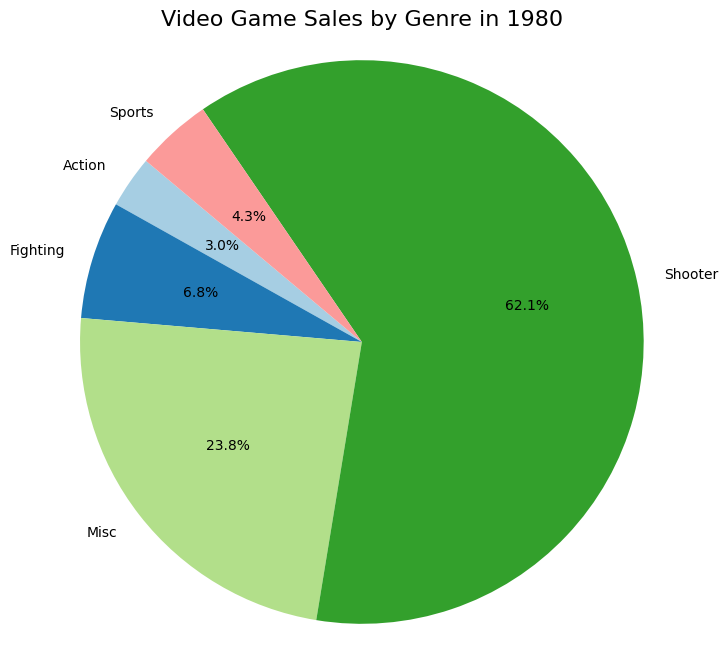

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for sales in the year 1980
df_1980 = df_games_year[(df_games_year['release_year'] == 1980)]

# Group by genre and sum sales
genre_sales_1980 = df_1980.groupby('genre')['sales'].sum()

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(genre_sales_1980, labels=genre_sales_1980.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Video Game Sales by Genre in 1980', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [4]:
df_games_year = pd.read_csv(r'C:\Users\abdul\OneDrive\Desktop\video_game_sales\raw\year_genre_region.csv')
df_games_year.head()

,release_year,genre,region,sales
0,1980,Action,North America,0.32
1,1980,Fighting,North America,0.72
2,1980,Misc,North America,2.53
3,1980,Shooter,North America,6.56
4,1980,Sports,North America,0.46


In [22]:
df_games_year.head(10)

,release_year,genre,region,sales
0,1980,Action,North America,0.32
1,1980,Fighting,North America,0.72
2,1980,Misc,North America,2.53
3,1980,Shooter,North America,6.56
4,1980,Sports,North America,0.46
5,1981,Action,North America,13.86
6,1981,Platform,North America,6.47
7,1981,Puzzle,North America,2.09
8,1981,Racing,North America,0.45
9,1981,Shooter,North America,9.37


In [23]:
# Filter rows where the Year is a multiple of 5
df_filtered = df_games_year[df_games_year['release_year'] % 5 == 0]

# Display the filtered DataFrame
df_filtered

,release_year,genre,region,sales
0,1980,Action,North America,0.32
1,1980,Fighting,North America,0.72
2,1980,Misc,North America,2.53
3,1980,Shooter,North America,6.56
4,1980,Sports,North America,0.46
...,...,...,...,...
1931,2015,Shooter,Worldwide,67.49
1932,2015,Simulation,Worldwide,5.64
1933,2015,Sports,Worldwide,40.90
1934,2015,Strategy,Worldwide,1.84


In [24]:
from IPython.display import display
display(df_games_year)

,release_year,genre,region,sales
0,1980,Action,North America,0.32
1,1980,Fighting,North America,0.72
2,1980,Misc,North America,2.53
3,1980,Shooter,North America,6.56
4,1980,Sports,North America,0.46
...,...,...,...,...
1945,2016,Sports,Worldwide,23.53
1946,2016,Strategy,Worldwide,1.15
1947,2017,Action,Worldwide,0.01
1948,2017,Role-Playing,Worldwide,0.05


In [26]:
df_usa = df_games_year[df_games_year['region'] == 'North America']

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter USA sales
df_usa = df_games_year[df_games_year['region'] == 'North America']

# Keep only the last 20 years
recent_years = df_usa['release_year'] >= (df_usa['release_year'].max() - 19)
df_recent_usa = df_usa[recent_years]

# Group by genre and sum sales
genre_sales = df_recent_usa.groupby('genre')['sales'].sum().sort_values(ascending=False)

# Display the top genre
top_genre = genre_sales.idxmax()
top_sales = genre_sales.max()
print(f"Top genre: {top_genre} with {top_sales:.2f} million sales")

🎮 Top genre: Action with 734.48 million sales


In [18]:
# Display the column names of the DataFrame
print(df_games_year.columns)


Index(['release_year', 'genre', 'region', 'sales'], dtype='object')


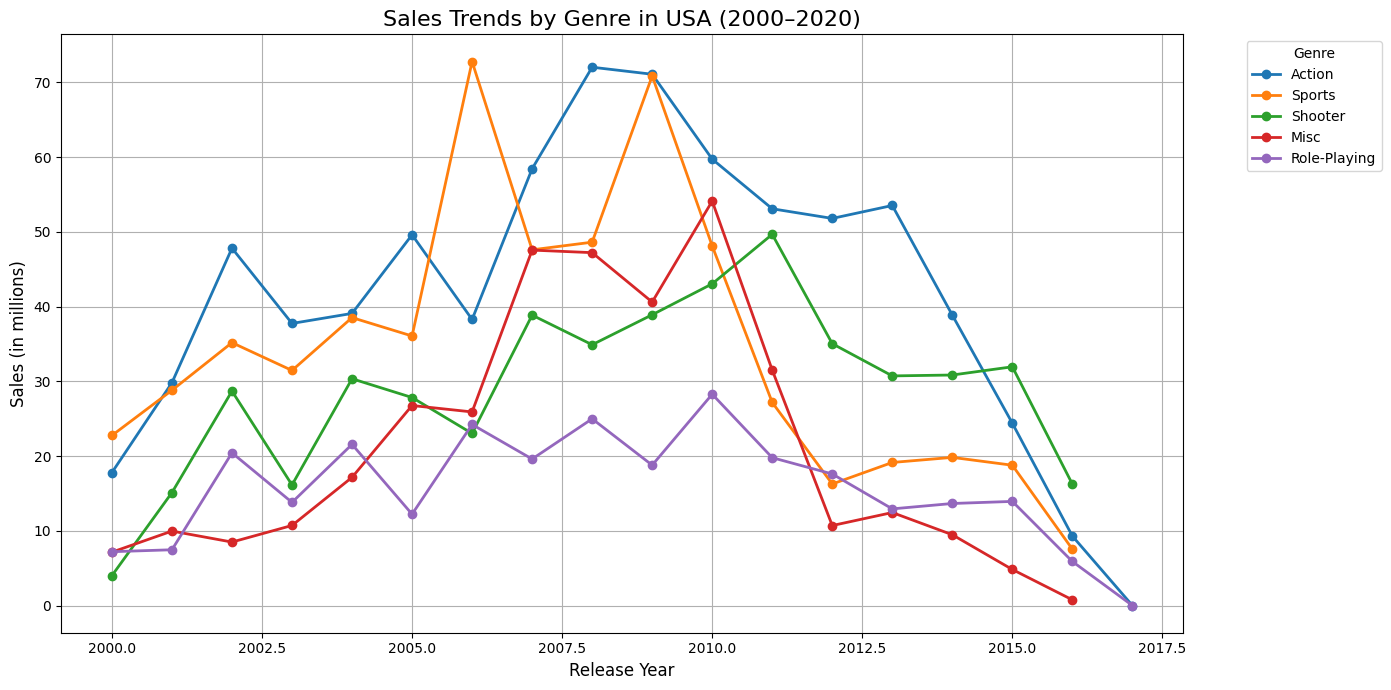

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for North America and years between 2000 and 2020
df_usa = df_games_year[
    (df_games_year['region'] == 'North America') & 
    (df_games_year['release_year'] >= 2000) & 
    (df_games_year['release_year'] <= 2020)
]

# Group by release year and genre, summing sales
sales_by_year_genre = df_usa.groupby(['release_year', 'genre'])['sales'].sum().unstack()

# Sort by total sales and get the top 5 genres
top_5_genres = sales_by_year_genre.sum(axis=0).sort_values(ascending=False).head(5).index

# Filter data to include only the top 5 genres
sales_by_year_genre_top_5 = sales_by_year_genre[top_5_genres]

# Plotting the sales trends over time for top 5 genres
plt.figure(figsize=(14, 7))

# Plot the sales data for each top 5 genre
for genre in top_5_genres:
    plt.plot(sales_by_year_genre_top_5.index, sales_by_year_genre_top_5[genre], label=genre, marker='o', linewidth=2)

plt.title('Sales Trends by Genre in USA (2000–2020)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

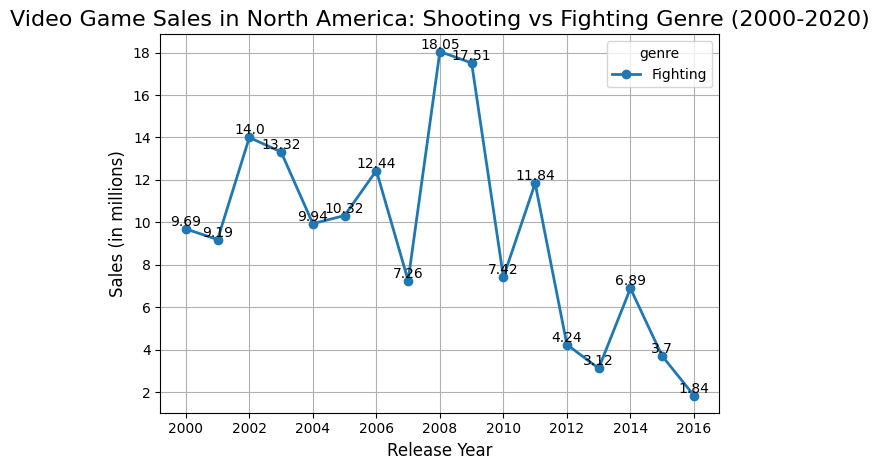

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_games_year is already loaded

# Filter for North America sales
df_usa = df_games_year[df_games_year['region'] == 'North America']

# Filter for genres 'Shooting' and 'Fighting'
df_filtered = df_usa[df_usa['genre'].isin(['Shooting', 'Fighting'])]

# Filter for years between 2000 and 2020
df_filtered = df_filtered[(df_filtered['release_year'] >= 2000) & (df_filtered['release_year'] <= 2020)]

# Group by release year and genre, summing sales
sales_by_genre_year = df_filtered.groupby(['release_year', 'genre'])['sales'].sum().unstack()

# Plot the data
plt.figure(figsize=(12, 6))

# Create the line plot for each genre
sales_by_genre_year.plot(kind='line', linewidth=2, marker='o')

# Add labels and title
plt.title('Video Game Sales in North America: Shooting vs Fighting Genre (2000-2020)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.grid(True)

# Display the exact sales values on the plot
for year in sales_by_genre_year.index:
    for genre in sales_by_genre_year.columns:
        plt.text(year, sales_by_genre_year.loc[year, genre], round(sales_by_genre_year.loc[year, genre], 2), 
                 horizontalalignment='center', verticalalignment='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [34]:
print(df_filtered['genre'].value_counts())

genre
Fighting    17
Name: count, dtype: int64


In [35]:
print(df_usa[df_usa['genre'] == 'Shooting']['release_year'].value_counts().sort_index())

Series([], Name: count, dtype: int64)


In [38]:
# Filter for Shooting genre in North America
shooting_years = df_usa[df_usa['genre'] == 'Shooting']['release_year'].unique()

# Sort the years
shooting_years.sort()
print(shooting_years)

[]


In [40]:
# Filter for North America and Shooting genre
shooting_sales_usa = df_usa[df_usa['genre'] == 'Shooting']

# Group by release year and sum the sales
shooting_sales_by_year = shooting_sales_usa.groupby('release_year')['sales'].sum().sort_index()

# Display the result
print(shooting_sales_by_year)

Series([], Name: sales, dtype: float64)


In [41]:
df_usa['genre'].unique()

array(['Action', 'Fighting', 'Misc', 'Shooter', 'Sports', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

<Figure size 1200x600 with 0 Axes>

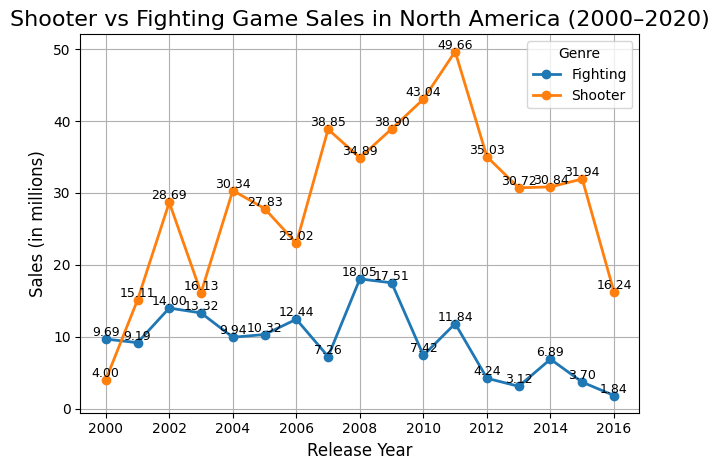

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for North America and both genres between 2000 and 2020
filtered_df = df_games_year[
    (df_games_year['region'] == 'North America') &
    (df_games_year['genre'].isin(['Shooter', 'Fighting'])) &
    (df_games_year['release_year'] >= 2000) &
    (df_games_year['release_year'] <= 2020)
]

# Group by year and genre, sum sales
sales_by_year_genre = filtered_df.groupby(['release_year', 'genre'])['sales'].sum().unstack()

# Plot
plt.figure(figsize=(12, 6))
sales_by_year_genre.plot(kind='line', marker='o', linewidth=2)

# Titles and labels
plt.title('Shooter vs Fighting Game Sales in North America (2000–2020)', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.grid(True)
plt.legend(title='Genre')

# Add value labels
for year in sales_by_year_genre.index:
    for genre in sales_by_year_genre.columns:
        value = sales_by_year_genre.loc[year, genre]
        if not pd.isna(value):
            plt.text(year, value, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

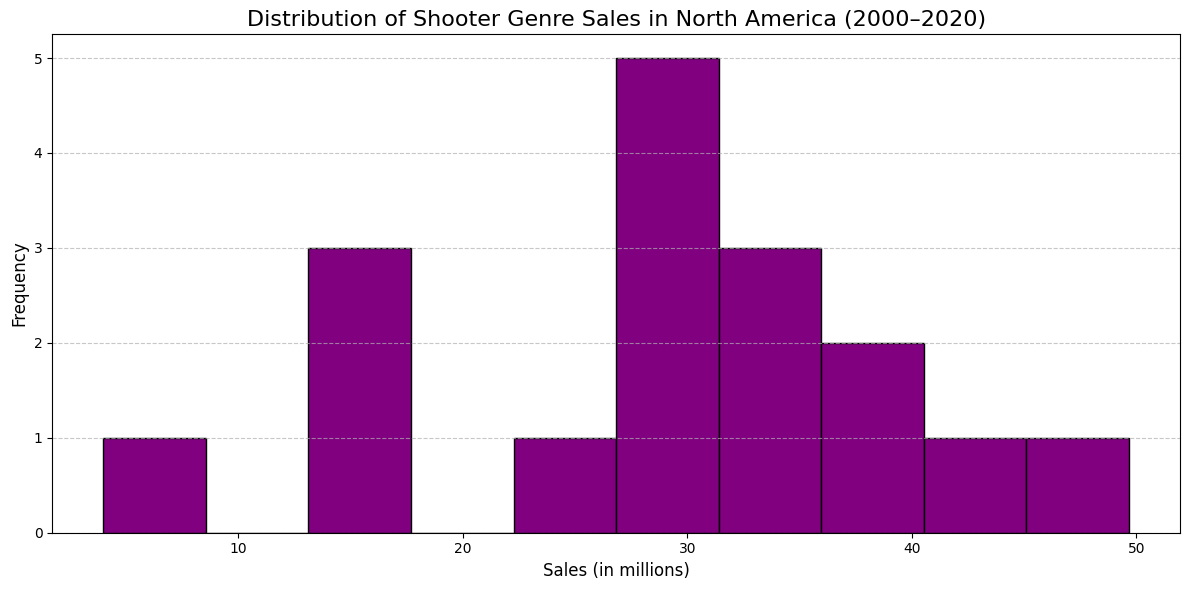

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for North America and the 'Shooter' genre between 2000 and 2020
shooter_sales = df_games_year[
    (df_games_year['region'] == 'North America') &
    (df_games_year['genre'] == 'Shooter') &
    (df_games_year['release_year'] >= 2000) &
    (df_games_year['release_year'] <= 2020)
]

# Group by year and sum sales
shooter_sales_by_year = shooter_sales.groupby('release_year')['sales'].sum()

# Plot (histogram)
plt.figure(figsize=(12, 6))
# Use plt.hist() for the histogram
plt.hist(shooter_sales_by_year.values, bins=10, color='purple', edgecolor='black')  # Bins control the number of intervals
plt.title('Distribution of Shooter Genre Sales in North America (2000–2020)', fontsize=16)
plt.xlabel('Sales (in millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Filter for North America and year 2012
df_2012_na = df_games_year[
    (df_games_year['region'] == 'North America') & 
    (df_games_year['release_year'] == 2012)
]

# Group by genre and sum the sales
genre_sales_2012 = df_2012_na.groupby('genre')['sales'].sum().reset_index()

# Sort genres by sales (highest to lowest)
genre_sales_2012 = genre_sales_2012.sort_values(by='sales', ascending=False).reset_index(drop=True)

# Display the result
print("Genres with sales data in 2012 (North America):")
print(genre_sales_2012)

Genres with sales data in 2012 (North America):
           genre  sales
0         Action  51.79
1        Shooter  35.03
2   Role-Playing  17.60
3         Sports  16.26
4           Misc  10.70
5       Platform   7.24
6         Racing   4.26
7       Fighting   4.24
8     Simulation   3.11
9      Adventure   1.78
10      Strategy   0.95
11        Puzzle   0.30


In [12]:
import pandas as pd
import plotly.express as px

# Filter for North America and years 2012–2016
df_usa_2012_2016 = df_games_year[
    (df_games_year['region'] == 'North America') & 
    (df_games_year['release_year'] >= 2012) & 
    (df_games_year['release_year'] <= 2016)
]

# Group sales by year and genre
df_grouped = df_usa_2012_2016.groupby(['release_year', 'genre'])['sales'].sum().reset_index()

# Create comparative bar chart
fig = px.bar(
    df_grouped,
    x='release_year',
    y='sales',
    color='genre',
    barmode='group',
    title='Video Game Sales by Genre in North America (2012–2016)',
    labels={'release_year': 'Year', 'sales': 'Sales (in millions)', 'genre': 'Genre'}
)

fig.update_layout(xaxis=dict(dtick=1))  # Ensure each year shows on the axis
fig.show()

In [13]:
import pandas as pd
import plotly.express as px

# Define the genres we want to include
selected_genres = ['Shooter', 'Action', 'Fighting', 'Adventure']

# Filter the dataset for North America, selected years and selected genres
df_filtered = df_games_year[
    (df_games_year['region'] == 'North America') &
    (df_games_year['release_year'].between(2012, 2016)) &
    (df_games_year['genre'].isin(selected_genres))
]

# Group sales by year and genre
sales_by_year_genre = df_filtered.groupby(['release_year', 'genre'])['sales'].sum().reset_index()

# Pivot the data so each genre becomes a column
df_pivot = sales_by_year_genre.pivot(index='release_year', columns='genre', values='sales')

# Calculate percentage change year-over-year
df_pct_change = df_pivot.pct_change() * 100  # Convert to percentage
df_pct_change = df_pct_change.reset_index().melt(id_vars='release_year', var_name='genre', value_name='percent_change')

# Drop rows with NaN (since the first year has no previous year to compare to)
df_pct_change = df_pct_change.dropna()

# Plot
fig = px.line(
    df_pct_change,
    x='release_year',
    y='percent_change',
    color='genre',
    markers=True,
    title='Year-over-Year Percentage Change in Sales by Genre (2012–2016)',
    labels={
        'release_year': 'Year',
        'percent_change': 'Sales Change (%)',
        'genre': 'Genre'
    }
)

fig.update_layout(yaxis_tickformat=".1f", xaxis=dict(dtick=1), yaxis_title='Percentage Change (%)')
fig.show()

In [24]:
genres_1994 = df_games_year[df_games_year['release_year'] == 1994]
genres_1994_summary = genres_1994.groupby('genre')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

print("Genres with sales data in 1994:")
print(genres_1994_summary)

Genres with sales data in 1994:
           genre  sales
4       Platform  57.50
2       Fighting  16.96
10        Sports  16.80
8        Shooter  16.60
7   Role-Playing  14.24
1      Adventure   7.48
11      Strategy   7.13
3           Misc   5.72
9     Simulation   5.45
6         Racing   4.37
0         Action   3.10
5         Puzzle   3.06


In [17]:
genres_1996 = df_games_year[df_games_year['release_year'] == 1996]
genres_1996_summary = genres_1996.groupby('genre')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)

print("Genres with sales data in 1996:")
print(genres_1996_summary)

Genres with sales data in 1996:
           genre  sales
7   Role-Playing  87.95
6         Racing  56.51
4       Platform  56.46
0         Action  41.18
2       Fighting  36.10
10        Sports  34.87
9     Simulation  22.66
3           Misc  21.34
8        Shooter  13.81
11      Strategy  11.22
1      Adventure   8.37
5         Puzzle   7.83


In [18]:
genres_1997 = df_games_year[df_games_year['release_year'] == 1997]
genres_1997_summary = (
    genres_1997
    .groupby('genre')['sales']
    .sum()
    .reset_index()
    .sort_values(by='sales', ascending=False)
    .reset_index(drop=True)  #  This resets the index cleanly
)

print(" Genres with sales data in 1997:")
print(genres_1997_summary)

 Genres with sales data in 1997:
           genre  sales
0         Racing  63.83
1         Sports  60.06
2         Action  55.17
3        Shooter  44.33
4       Platform  43.71
5   Role-Playing  43.61
6       Fighting  23.56
7     Simulation  19.29
8       Strategy  15.43
9         Puzzle  11.76
10          Misc  11.37
11     Adventure   9.93


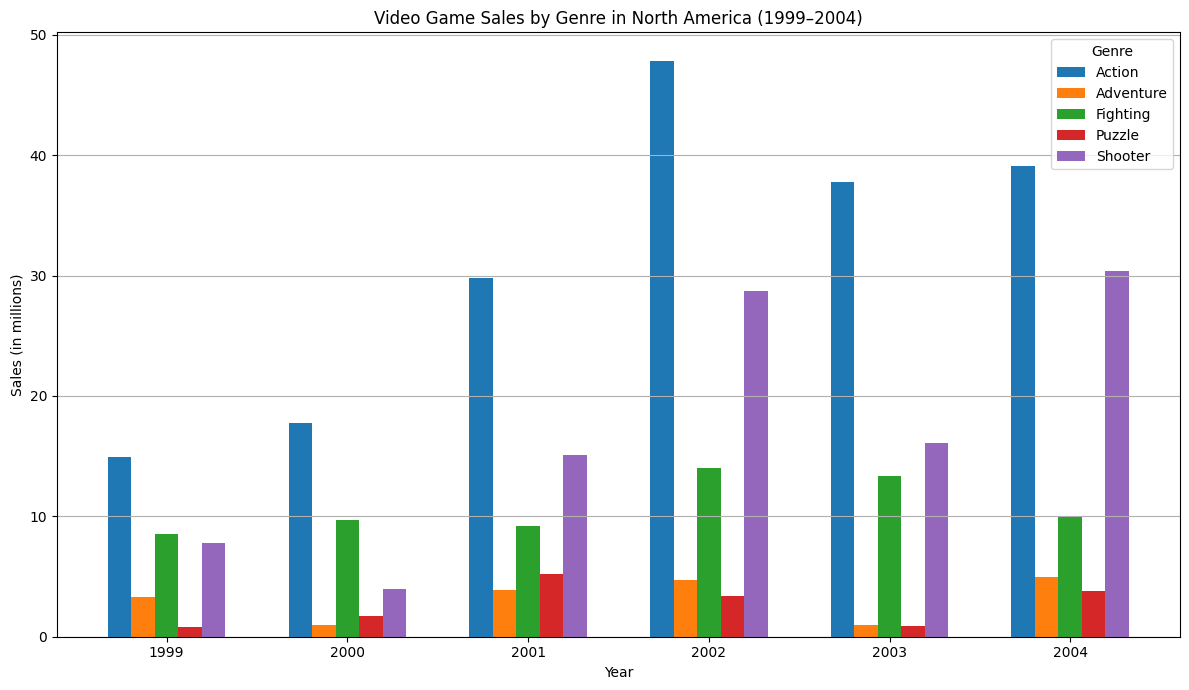

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Pivot data to have genres as columns, years as index
df_pivot = df_grouped.pivot(index='release_year', columns='genre', values='sales').fillna(0)

# Set up the bar chart parameters
years = df_pivot.index.tolist()
genres = df_pivot.columns.tolist()
n_genres = len(genres)
bar_width = 0.13  # width of each bar
x = range(len(years))  # the label locations

plt.figure(figsize=(12, 7))

# Plot each genre as grouped bars side by side
for i, genre in enumerate(genres):
    plt.bar(
        [pos + i * bar_width for pos in x],  # shift bars for each genre
        df_pivot[genre],
        width=bar_width,
        label=genre
    )

plt.title('Video Game Sales by Genre in North America (1999–2004)')
plt.xlabel('Year')
plt.ylabel('Sales (in millions)')
plt.xticks([pos + bar_width * (n_genres / 2 - 0.5) for pos in x], years)  # center x-ticks between groups
plt.legend(title='Genre')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

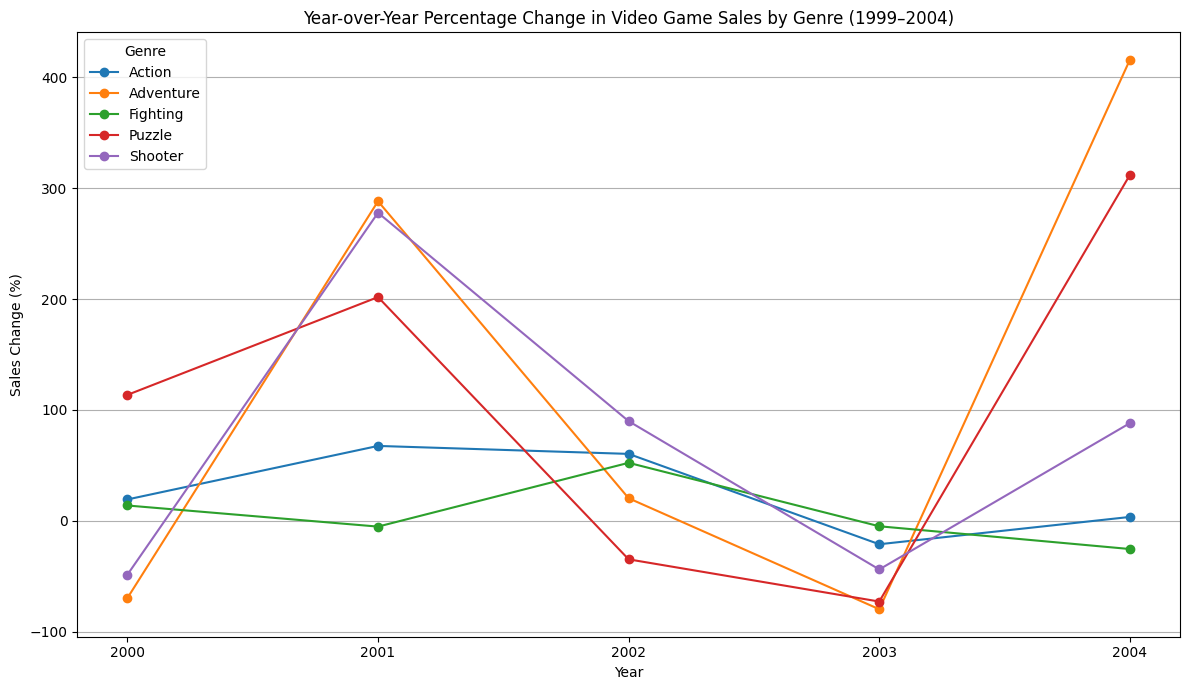

In [25]:
import matplotlib.pyplot as plt

# Pivot the percentage change data so each genre is a column again for easy plotting
df_plot = df_pct_change.pivot(index='release_year', columns='genre', values='percent_change')

plt.figure(figsize=(12, 7))

# Plot each genre as a separate line
for genre in df_plot.columns:
    plt.plot(df_plot.index, df_plot[genre], marker='o', label=genre)

plt.title('Year-over-Year Percentage Change in Video Game Sales by Genre (1999–2004)')
plt.xlabel('Year')
plt.ylabel('Sales Change (%)')
plt.xticks(df_plot.index)  # Ensure all years are shown
plt.grid(axis='y')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()
